<a href="https://colab.research.google.com/github/EddyBautista-93/Intro-To-AI-Agents/blob/main/Intro_to_ai_agents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to AI Agents - EventForge

For this workshop we will be creating a AI Agent with the ability to help us plan for a event we will be hosting. \
Below is the following tools we will be looking building together.

Tool # | Name | What it adds
--- | --- | ---
1 | DuckDuckGoSearch | Venue Discovery - Built In
2 | Image Generation | Create Promo Visual - Community Tool
3 | Post Gen | Generate Post
4 | Budget Estimator | Financial planning for headcount, food, venue, and swag - Custom


# Getting started

We’ll begin by installing the dependencies needed for building our smart event planning agent.

In [ ]:
! pip install smolagents gradio

The Installs


*   **smolagents**: A lightweight framework for building LLM-powered agents with tool calling support.
*   **gradio**: A UI library for interactive web demos in notebooks



To use models like Mixtral from Hugging Face, you’ll need to authenticate:

In [ ]:
from huggingface_hub import notebook_login

notebook_login()


To create a smart AI agent with SmolAgents, you need two core things:


*   A model – the brain of the agent that generates and understands text
*   A set of tools – external functions that the model can call to extend its capabilities

## The Model
Text generation models power your agent. Think of the model as the engine that drives everything forward. SmolAgents supports multiple model types depending on how you want to run your agent.

### Model Options
**TransformerModel** \
Runs a locally initialized transformers pipeline. Ideal for models you have downloaded or finetuned.

**HFApiModel**(What we'll use) \
Uses Hugging Face Inference API via huggingface_hub.InferenceClient to call hosted models. Think LLaMA and Mixtral

**LiteLLM**
Suppoers calling 100+ LLMs through the LiteLLM router-userful for OpenAI, claude, etc with unified configs.

**AzureOpenAiServerModel** \
Connects to OpenAI models deployed through Microsoft Azure

**MLXModel** \
Creates a mlx-lm pipeline that run inference on your local machine.


# Tools
Tools give your AI agent ***agency*** - they let thge model take actions beyond just talking.\
Tools are passed in like this:
``` python
tools=[]
```
These tools can incluse things like:


*   Search Engines
*   Image Generators
*   Custom Tools
*   RAG (Retrieval Augmented Generation ) Functions

## Creating the Agent
Once you have the model and tools, you can create a agent like this:

``` python
model_id = "meta-llama/Llama-3.3-70B-Instruct"
model = HfApiModel(model_id=model_id) # By default if you don't pass in a model id the hfapi it uses the qwen model
agent = ToolCallingAgent(tools=[], model=model)
```

# ToolCallingAgent

The ToolCallingAgent is a lightweight class designed to let large language models interact with tools.

Since we're building an agent that plans events, we'll focus on this agent type to give the model the power to search the web, generate images, generate post and estimate budgets.

Key Features of ToolCallingAgent
- **Contextual Memory**: Maintains a chat history, allowing for ongoing reasoning and continuity across multiple prompts..
- **Multi-Step Reasoning**: ToolCallingAgents follow a "think-act-observe" cycle as part of the ReAct framework.
- **Customizability**: You can define:
  * A list of tools for the agent to use.
  * Specify prompt templates.
  * Adjust other parameters like planning intervals during initialization



In short: ToolCallingAgent is what gives your AI brain the power to do more than talk—it can take action.

## Tool 1: DuckDuckGoSearch + Location
The first tool we're using is built directly into the SmolAgents framework: DuckDuckGoSearchTool.

This tools allows the agent to search the web in real time and retrieve up-to-date information. Perfect for finding venues, vendors, and other real-world event planning needs.

This tool:
* Searches DuckDuckGo for relevant results.
* Works out of the box - no API key needed.
* Can be combined with custom tools (like a location preset)

Allow the Agent to Search for the web

In [14]:
from smolagents import ToolCallingAgent, HfApiModel , DuckDuckGoSearchTool # we introduce a built in tool

# You can choose to not pass any model_id to HfApiModel to use a default free
# model Qwen/Qwen2.5-Coder-32B-Instruct
model = HfApiModel()

# Initialize the built in search tool
web_search = DuckDuckGoSearchTool()

# Custom tool that returns the location you are located ( We use be using
# location logic in production)
@tool
def get_location() -> str:
    """
    Returns the default location for event planning.
    """
    return "San Antonio, Texas"

And then you bring it all together!

In [16]:
agent = ToolCallingAgent(tools=[web_search, get_location], model=model)
agent.run("Whats a good indoor venue for a tech focused event with free wifi where I am. Also how much would the venue cose")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Whats a good indoor venue for a tech focused event with free wifi where I am. Also how much would the venue     │
│ cose                                                                                                            │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'get_location' with arguments: {}                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Observations: San Antonio, Texas

[Step 1: Duration 0.88 seconds| Input tokens: 1,244 | Output tokens: 13]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'web_search' with arguments: {'query': 'Tech focused indoor venue in San Antonio Texas with free  │
│ wifi'}                                                                                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Observations: ## Search Results

|Find Indoor Party venues for rent in San Antonio, TX - 
Giggster](https://giggster.com/find/san-antonio--tx/indoor-party)
Find Indoor Party venues in San Antonio, TX - popular venues for a Indoor Party. The BEST venues in San Antonio, 
TX, book now! ... Wifi and parking in downtown included ($25 value per car!) ... or one to one coaching or 
mentoring meetings. Private space for special focused meetings one hour to a full day rental available. 2-6 
persons, Wifi ...

|19 Top Corporate Event Venues in San Antonio, TX - 
teambuilding.com](https://teambuilding.com/blog/corporate-event-venues-san-antonio-tx)
Here is our list of the best corporate event venues in San Antonio, Texas. ... and rental packages allow for indoor
or outdoor events. Host your next event at the Witte ... with valet parking, WiFi, and audio video equipment 
available, all you have to do is show up. Check out Zocca. 12. Tower of the Americas. Tower of the Americas is one 
of the ...

|THE BEST 10 Venues & Event Spaces in SAN ANTONIO, TX - 
Yelp](https://www.yelp.com/search?cflt=venues&find_loc=San+Antonio,+TX)
Best Venues & Event Spaces in San Antonio, TX - San Antonio Glasshouse, Pearl Studio, The Veranda, Flower In Flour,
Villa di Campagna, Magnolia Halle, Los Patios, Ivy Hall, Freight, Rio Plaza ... Free Wedding Venues in San Antonio,
Texas. Cheap Baby Shower Venues in San Antonio, Texas. Rehearsal Dinner in San Antonio, Texas.

|36 Best Party Venues for Rent in San Antonio, TX | 
Peerspace](https://www.peerspace.com/venues/san-antonio--tx/party-venue)
Rent a party venue in San Antonio, TX. Discover thousands of unique party venues for rent perfect for your event. 
... pink house with mid-century modern and retro charm! Full kitchen, bathroom, private and unique triangular 
outdoor patio, wifi, queen sized temper-pedic bed, driveway, plenty of street parking, and more! Located in an 
amazing ...

|TOP 10 BEST Venues in San Antonio, TX - Updated 2024 - 
Yelp](https://www.yelp.com/search?find_desc=venues&find_loc=San+Antonio,+TX)
Top 10 Best Venues in San Antonio, TX - December 2024 - Yelp - San Antonio Glasshouse, The Veranda, Pearl Studio, 
Ivy Hall, Freight, Magnolia Halle, The Argyle, Los Patios, Gardens At West Green, Granberry Hills ... Free Wi-Fi. 
Open to All. Offers Takeout. Music: Live. Outdoor Seating. Music: DJ. See all. ... Indoor Playgrounds for Kids in 
San ...

|5 New Event & Meeting Venues in San 
Antonio](https://www.visitsanantonio.com/meeting-professionals/in-the-news/post/new-event-and-meeting-venues-in-san
-antonio/)
San Antonio continues to impress business leaders with new and reimagined venues. Here are 5 of the newest venues 
in San Antonio to consider for your next corporate event. ... The 13,000 indoor-outdoor spaces can hold anywhere 
from 50 to 1,300 people indoors and expand to accommodate 2,500 to 3,500 outdoor guests. This is the perfect spot 
for ...

|Modern Event Venue w/3 different spaces (up to 300 ppl) - 
Peerspace](https://www.peerspace.com/pages/listings/64d523151fd449002261cca5)
Production space for $200 in San Antonio, , TX. Host a memorable event in our 9,000 sq. ft. meeting space that can 
host up to 300 people comfortably. ... party, or other special event, our private venue is ready to roll. With 
plenty of space to accommodate large groups while retaining the intimate feel of a small gathering in a setting 
that is ...

|The 16 Best Small Venues for Rent in San Antonio, TX | 
Tagvenue](https://www.tagvenue.com/us/hire/small-venues/san-antonio)
Renting a small venue in San Antonio offers many benefits, particularly if you are looking to create an intimate 
and personalized event.Smaller event spaces provide a cozy atmosphere, making it easier to connect with your guests
and ensure everyone feels involved.They are often more cost-effective, allowing you to allocate your budget towards
other important aspects of your event, such as ...

|36 Best Meeting Rooms for Rent in San Anton

[Step 2: Duration 2.70 seconds| Input tokens: 2,543 | Output tokens: 41]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'web_search' with arguments: {'query': 'cost of Modern Event Venue w/3 different spaces (up to    │
│ 300 ppl) in San Antonio, TX on Peerspace'}                                                                      │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Observations: ## Search Results

|Modern Event Venue w/3 different spaces (up to 300 ppl) - 
Peerspace](https://www.peerspace.com/pages/listings/64d5231546ccb900224c7249)
Event space for $200 in San Antonio, , TX. Host a memorable event in our 9,000 sq. ft. meeting space that can host 
up to 300 people comfortably. The space is Wi-Fi ready and come. ... Modern Event Venue w/3 different spaces (up to
300 ppl) Hollywood Park, San Antonio, TX. 1/8. View all.

|36 Best Party Venues for Rent in San Antonio, TX | 
Peerspace](https://www.peerspace.com/venues/san-antonio--tx/party-venue)
Easily rent a party and reception venue in San Antonio, TX. Access a collection of unique, undiscovered locations 
and make your event a meaningful one. ... Modern Event Venue w/3 different spaces (up to 300 ppl) Hollywood Park, 
San Antonio, TX. 4.9 (15) ... How much does a party venue cost to rent in San Antonio? Party venues in San Antonio 
...

|35 Best Event Venues for Rent in San Antonio, TX | 
Peerspace](https://www.peerspace.com/venues/san-antonio--tx/event-venue)
Easily rent an event venue in San Antonio, TX for your next function. Access a collection of unique, undiscovered 
locations and make your event a meaningful one. ... Modern Event Venue w/3 different spaces (up to 300 ppl) ... 
Host a memorable event in our 9,000 sq. ft. meeting space that can host up to 300 people comfortably. The space is 
Wi-Fi ...

|The 16 Best Cheap Venues for Rent in San Antonio, TX | 
Tagvenue](https://www.tagvenue.com/us/hire/cheap-venues/san-antonio)
71 Event Space Venues in San Antonio, TX Show map See all venues (71) ... This event space fits up to 120 seated 
and 200 standing, it comes with a PA system, music speakers, a kitchen with a fridge, and a restroom for your 
guests to use. ... Weddings and large corporate events may have different cost expectations compared to a small, 
casual ...

|Rent Venues & Event Locations in San Antonio, TX - EventUp](https://eventup.com/venues/san-antonio-tx/)
Rent event spaces and party venues in San Antonio, TX. Find the best event locations in San Antonio for your 
wedding, corporate event, or party on EventUp.

|The 16 Best Event Spaces for Rent in San Antonio, TX - Tagvenue](https://www.tagvenue.com/us/city/san-antonio)
How much does it cost to rent an event space in San Antonio, Texas? While prices vary largely, there are definitely
affordable venue rental options in San Antonio, as well as some more premium-priced event spaces! On average, 
rental fees can vary anywhere from $500 to $20,000+ per session, while hourly rates tend to average around $100.

|TOP 10 BEST Venues & Event Spaces in San Antonio, TX - 
Yelp](https://www.yelp.com/search?find_desc=venues+&+event+spaces&find_loc=San+Antonio,+TX)
Top 10 Best Venues & Event Spaces in San Antonio, TX - March 2025 - Yelp - San Antonio Glasshouse, Pearl Studio, 
The Veranda, Flower In Flour, Villa di Campagna, Magnolia Halle, Los Patios, Ivy Hall, Freight, Rio Plaza ... 
Another "Visiting San Antonio" Thread But With Different Questions. ... What did people search for similar to 
venues ...

|Party Venues in San Antonio, TX - 159 Venues | Pricing - 
Eventective](https://www.eventective.com/san-antonio-tx/party-event-venues/)
Find and contact local Party Venues in San Antonio, TX with pricing and availability for your party event. ... - 
Meeting space for 30 with modern tech - Coffee service, continental breakfast, and access to an on-site full bar. 
... Your Hill Country Bar, Live Music Venue, and Event Space in San Antonio IF YOU WANT TO HEAR BACK FROM US PLEASE
...

|How Much Does it Cost to Rent a Venue for an Event? - 
Eventbrite](https://www.eventbrite.com/blog/event-venues-cost-ds00/)
Some venues charge a separate fee for the space rather than bundle it with the catering cost. If you're having a 
party or dinner, you can pay a price per person to cover the event space, food, serving staff, and a set amount of 
alcohol (usually an allotted number of drink token

[Step 3: Duration 6.10 seconds| Input tokens: 5,151 | Output tokens: 87]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 4 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'final_answer' with arguments: {'answer': "A good indoor venue for a tech-focused event with free │
│ WiFi in San Antonio, Texas, is the Modern Event Venue w/3 different spaces at Hollywood Park. The venue can     │
│ host up to 300 people, comes with free WiFi, and starts at $200 for rental. For more comprehensive pricing,     │
│ it's advisable to check with the venue directly, as costs for additional services may vary."}                   │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Final answer: A good indoor venue for a tech-focused event with free WiFi in San Antonio, Texas, is the Modern 
Event Venue w/3 different spaces at Hollywood Park. The venue can host up to 300 people, comes with free WiFi, and 
starts at $200 for rental. For more comprehensive pricing, it's advisable to check with the venue directly, as 
costs for additional services may vary.

[Step 4: Duration 9.44 seconds| Input tokens: 8,960 | Output tokens: 189]

"A good indoor venue for a tech-focused event with free WiFi in San Antonio, Texas, is the Modern Event Venue w/3 different spaces at Hollywood Park. The venue can host up to 300 people, comes with free WiFi, and starts at $200 for rental. For more comprehensive pricing, it's advisable to check with the venue directly, as costs for additional services may vary."

## Tool 2: Image Generation
Now that agent can search for venues, let's give it the ability to generate promo visuals for the event.

SmolAgents supports loading third-party tools like text-to-image generators. In this example, we use the open-source model hosted at m-ric/text-to-image, which supports prompts like “minimal line art” or “AI poster design.
This tool:
* Generates images from text prompts
* Hosted on hugging face - no setup or api needed.

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Provide minimal line art promo art for my event, the theme is automating boring things with AI Agents.          │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'image_generator' with arguments: {'prompt': 'Minimalistic line art promo art for an event with   │
│ the theme of automating boring things with AI agents. High-res, clean design, geometric shapes and futuristic   │
│ elements. '}                                                                                                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Observations: Stored 'image.png' in memory.

[Step 1: Duration 3.50 seconds| Input tokens: 1,229 | Output tokens: 53]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'final_answer' with arguments: {'answer': 'image.png'}                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Final answer: Extracting key 'image.png' from state to return value 
'/tmp/tmpu6kvfm_v/eae0a7b6-5ed0-419b-b347-317deea7f1db.png'.

[Step 2: Duration 2.62 seconds| Input tokens: 2,554 | Output tokens: 76]

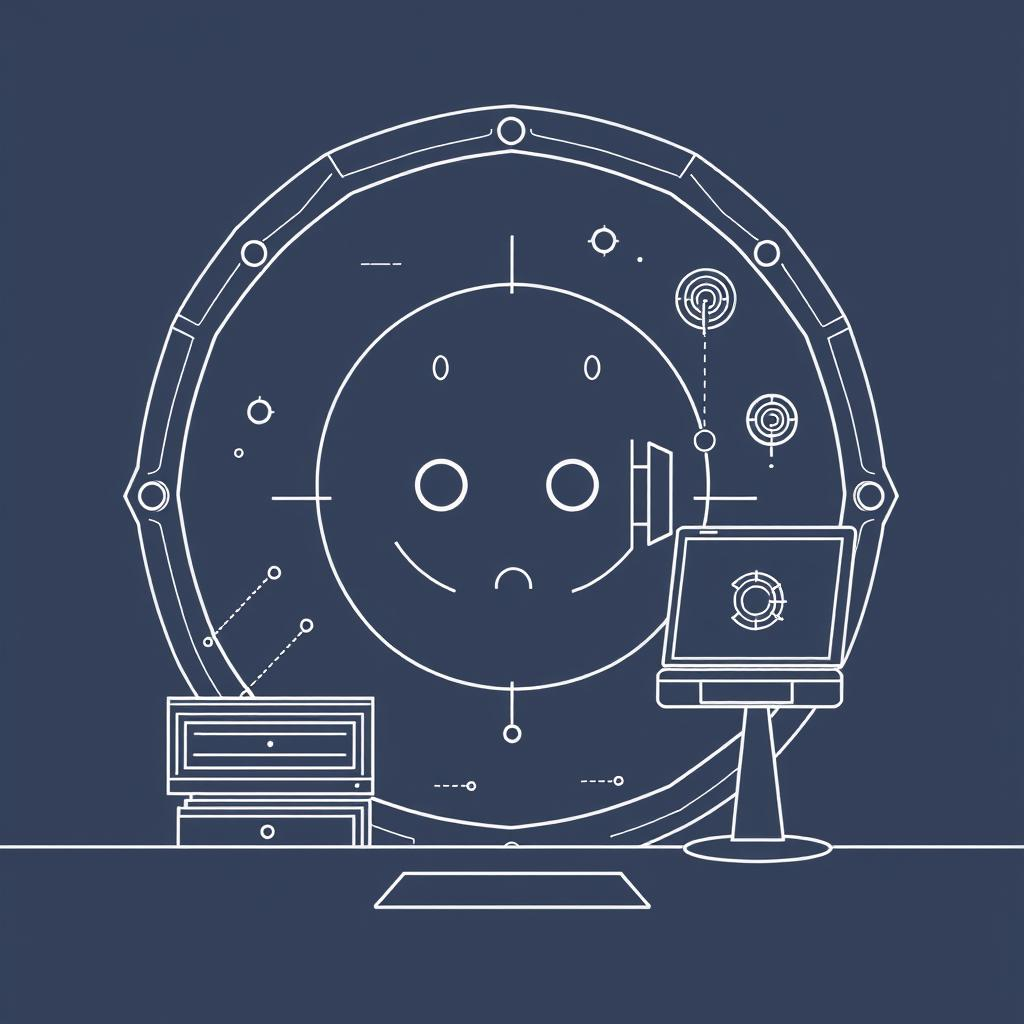

In [17]:
from smolagents import ToolCallingAgent, HfApiModel , DuckDuckGoSearchTool , load_tool
image_generation_tool = load_tool("m-ric/text-to-image", trust_remote_code=True)

agent = ToolCallingAgent(tools=[image_generation_tool], model=model)
agent.run("Provide minimal line art promo art for my event, the theme is automating boring things with AI Agents.")

## Tool 3: LinkedIn Post Generation

With an event idea, venue, and promo visuals in place, its time to get the word out! This tool helps your AI agent write a professional Linkedin Post to promote the event.

Instead of hardcoding a poat, this tool uses the LLM to generate a natural, dynamic social content based on structured inputs.

This tool:
* Generates a LinkedIn ready promo post.
* Uses the same model to write the content via an inernal ToolCallingAgent
* Accepts strucuturd fields like event name, date, and highlight

In [20]:
from smolagents import ToolCallingAgent, HfApiModel, tool

# Initialize the model
model = HfApiModel(model="mistralai/Mixtral-8x7B-Instruct-v0.1")

# Define the post generator tool
@tool
def generate_post(event_name: str, date: str, location: str, highlight: str = "networking and learning") -> str:
    """
    Generates a LinkedIn post for a tech event.

    Args:
        event_name: The name of the event.
        date: The date of the event.
        location: The city or venue where the event is held.
        highlight: What's special about the event. Defaults to 'networking and learning'.
    """
    sub_agent = ToolCallingAgent(model=model, tools=[])
    prompt = (
        f"Write a LinkedIn post promoting an event.\n\n"
        f"Event Name: {event_name}\n"
        f"Date: {date}\n"
        f"Location: {location}\n"
        f"Highlight: {highlight}\n\n"
        "Make it sound professional, friendly, and engaging. Add relevant hashtags."
    )
    return sub_agent.run(prompt)

In [21]:
agent = ToolCallingAgent(tools=[generate_post], model=model)

response = agent.run("Create a LinkedIn post for an event called AI Agent showcase at Geekdom on May the 10th. This event wraps up the ai workshops and talks to showcase what everyone built for the month")
print(response)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Create a LinkedIn post for an event called AI Agent showcase at Geekdom on May the 10th. This event wraps up    │
│ the ai workshops and talks to showcase what everyone built for the month                                        │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'generate_post' with arguments: {'highlight': 'wraps up the AI workshops and talks to showcase    │
│ what everyone built for the month', 'event_name': 'AI Agent showcase', 'date': 'May the 10th', 'location':      │
│ 'Geekdom'}                                                                                                      │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Write a LinkedIn post promoting an event.                                                                       │
│                                                                                                                 │
│ Event Name: AI Agent showcase                                                                                   │
│ Date: May the 10th                                                                                              │
│ Location: Geekdom                                                                                               │
│ Highlight: wraps up the AI workshops and talks to showcase what everyone built for the month                    │
│                                                                                                                 │
│ Make it sound professional, friendly, and engaging. Add relevant hashtags.                                      │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'final_answer' with arguments: {'answer': "🎉 Exciting News for Tech Enthusiasts! 🚀\\nJoin us    │
│ this month for the AI Agent Showcase on May the 10th at Geekdom! 🌐✨\\nCelebrate and conclude the journey of   │
│ our AI workshops and talks by seeing what innovative solutions have been crafted over the month. Come prepared  │
│ to be amazed by the creative implementations and gain fresh insights.\\n📅 Date: May 10th, 2023 \\\\\\📍        │
│ Location: Geekdom \\\\\\🎈 Event Highlights:\\n- Engage with fellow tech aficionados \\\\ \\- Discover          │
│ groundbreaking AI projects \\\\ \\- Network with industry leaders \\\\ \\Let's turn AI concepts into real-world │
│ triumphs together! Seize the opportunity and RSVP today.\\n#AIInnovation #TechShowcase #Geekdom #AILegends      │
│ #TechCommunity #InnovateWithUs 🚀👩\u200d💻👨\u200d💻"}                                                         │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Final answer: 🎉 Exciting News for Tech Enthusiasts! 🚀\nJoin us this month for the AI Agent Showcase on May the 
10th at Geekdom! 🌐✨\nCelebrate and conclude the journey of our AI workshops and talks by seeing what innovative 
solutions have been crafted over the month. Come prepared to be amazed by the creative implementations and gain 
fresh insights.\n📅 Date: May 10th, 2023 \\\📍 Location: Geekdom \\\🎈 Event Highlights:\n- Engage with fellow tech
aficionados \\ \- Discover groundbreaking AI projects \\ \- Network with industry leaders \\ \Let's turn AI 
concepts into real-world triumphs together! Seize the opportunity and RSVP today.\n#AIInnovation #TechShowcase 
#Geekdom #AILegends #TechCommunity #InnovateWithUs 🚀👩‍💻👨‍💻

[Step 1: Duration 10.52 seconds| Input tokens: 1,092 | Output tokens: 213]

Observations: 🎉 Exciting News for Tech Enthusiasts! 🚀\nJoin us this month for the AI Agent Showcase on May the 
10th at Geekdom! 🌐✨\nCelebrate and conclude the journey of our AI workshops and talks by seeing what innovative 
solutions have been crafted over the month. Come prepared to be amazed by the creative implementations and gain 
fresh insights.\n📅 Date: May 10th, 2023 \\\📍 Location: Geekdom \\\🎈 Event Highlights:\n- Engage with fellow tech
aficionados \\ \- Discover groundbreaking AI projects \\ \- Network with industry leaders \\ \Let's turn AI 
concepts into real-world triumphs together! Seize the opportunity and RSVP today.\n#AIInnovation #TechShowcase 
#Geekdom #AILegends #TechCommunity #InnovateWithUs 🚀👩‍💻👨‍💻

[Step 1: Duration 10.63 seconds| Input tokens: 1,092 | Output tokens: 213]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'final_answer' with arguments: {'answer': "🎉 Exciting News for Tech Enthusiasts! 🚀\\nJoin us    │
│ this month for the AI Agent Showcase on May the 10th at Geekdom! 🌐✨\\nCelebrate and conclude the journey of   │
│ our AI workshops and talks by seeing what innovative solutions have been crafted over the month. Come prepared  │
│ to be amazed by the creative implementations and gain fresh insights.\\n📅 Date: May 10th, 2023 \\\\Resources:  │
│ Geekdom \\\\Events Highlights:\\n- Engage with fellow tech aficionados \\\\- Discover groundbreaking AI         │
│ projects \\\\- Network with industry leaders \\\\Let's turn AI concepts into real-world triumphs together!      │
│ Seize the opportunity and RSVP today.\\\\[#AIInnovation #TechShowcase #Geekdom #AILegends #TechCommunity        │
│ #InnovateWithUs 🚀👩\u200d💻👨\u200d💻"}                                                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Final answer: 🎉 Exciting News for Tech Enthusiasts! 🚀\nJoin us this month for the AI Agent Showcase on May the 
10th at Geekdom! 🌐✨\nCelebrate and conclude the journey of our AI workshops and talks by seeing what innovative 
solutions have been crafted over the month. Come prepared to be amazed by the creative implementations and gain 
fresh insights.\n📅 Date: May 10th, 2023 \\Resources: Geekdom \\Events Highlights:\n- Engage with fellow tech 
aficionados \\- Discover groundbreaking AI projects \\- Network with industry leaders \\Let's turn AI concepts into
real-world triumphs together! Seize the opportunity and RSVP today.\\[#AIInnovation #TechShowcase #Geekdom 
#AILegends #TechCommunity #InnovateWithUs 🚀👩‍💻👨‍💻

[Step 2: Duration 9.93 seconds| Input tokens: 2,708 | Output tokens: 422]

🎉 Exciting News for Tech Enthusiasts! 🚀\nJoin us this month for the AI Agent Showcase on May the 10th at Geekdom! 🌐✨\nCelebrate and conclude the journey of our AI workshops and talks by seeing what innovative solutions have been crafted over the month. Come prepared to be amazed by the creative implementations and gain fresh insights.\n📅 Date: May 10th, 2023 \\Resources: Geekdom \\Events Highlights:\n- Engage with fellow tech aficionados \\- Discover groundbreaking AI projects \\- Network with industry leaders \\Let's turn AI concepts into real-world triumphs together! Seize the opportunity and RSVP today.\\[#AIInnovation #TechShowcase #Geekdom #AILegends #TechCommunity #InnovateWithUs 🚀👩‍💻👨‍💻


## Tool 4: Estimate Budget
Let’s add a tool to help estimate the total cost of your event based on the number of attendees and what services you include—like catering, venue rental, and swag.

This lets the agent do basic financial planning in seconds.

This tool:
* Estimates total cost for catering, vene, and swag

In [22]:
from smolagents import ToolCallingAgent, HfApiModel, tool


@tool
def estimate_budget(guests: int, catering: bool = True, venue: bool = True, swag: bool = False) -> dict:
    """
    This tool estimates the total cost of an event.

    Args:
        guests: The number of guests attending the event.
        catering: Whether catering is included. Defaults to True.
        venue: Whether a venue is included. Defaults to True.
        swag: Whether swag is included. Defaults to False.
    """
    base_cost = 0
    if catering:
        base_cost += guests * 15  # $15 per guest for food
    if venue:
        base_cost += 500  # Flat rate for venue
    if swag:
        base_cost += guests * 5  # $5 per guest for merch
    return {
        "Estimated Total": f"${base_cost}",
        "Breakdown": {
            "Catering": f"${guests * 15 if catering else 0}",
            "Venue": "$200" if venue else "$0",
            "Swag": f"${guests * 5 if swag else 0}"
        }
    }

agent = ToolCallingAgent(tools=[estimate_budget], model=model)
agent.run("How much will 50 guest cost me for this event and the breakdown of the expenses.")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ How much will 50 guest cost me for this event and the breakdown of the expenses.                                │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'estimate_budget' with arguments: {'guests': 50}                                                  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Observations: {'Estimated Total': '$1250', 'Breakdown': {'Catering': '$750', 'Venue': '$200', 'Swag': '$0'}}

[Step 1: Duration 2.20 seconds| Input tokens: 1,312 | Output tokens: 23]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'final_answer' with arguments: {'answer': 'The total cost for 50 guests is $1250. The breakdown   │
│ of expenses is as follows: Catering: $750, Venue: $200, Swag: $0'}                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Final answer: The total cost for 50 guests is $1250. The breakdown of expenses is as follows: Catering: $750, 
Venue: $200, Swag: $0

[Step 2: Duration 3.00 seconds| Input tokens: 2,720 | Output tokens: 82]

'The total cost for 50 guests is $1250. The breakdown of expenses is as follows: Catering: $750, Venue: $200, Swag: $0'

# Exercise: Custom Tools
Let’s put your creativity to work!

In this section, you’ll write your own custom tools that your agent can use. These boilerplate functions serve as a template—just edit the logic and descriptions to suit your needs.

In [ ]:
from smolagents import tool

@tool
def custom_tool_1() -> str:
    """
    This tool is a placeholder for your custom functionality.
    """
    return "This tool does nothing yet. Make it do something cool!"

@tool
def custom_tool_2() -> str:
    """
    This tool is another placeholder—get creative with it!
    """
    return "This tool also does nothing... for now."


## Bringing it all together

In [ ]:

import gradio as gr
from smolagents import ToolCallingAgent, HfApiModel


tool_sets = {
    "Custom Tools": [custom_tool_1, custom_tool_2],
    "Search Only": [web_search],
    "Post + Image": [generate_post, image_generation_tool],
    # "Full Power": [web_search, image_generation_tool, generate_agenda, estimate_budget]
}

# 4. Run agent
def run_agent(prompt, tool_choice):
    tools = tool_sets.get(tool_choice, [])
    agent = ToolCallingAgent(model=model, tools=tools)
    response = agent.run(prompt)
    return response

# 5. Gradio UI
gr.Interface(
    fn=run_agent,
    inputs=[
        gr.Textbox(label="Your Event Planning Prompt", placeholder="e.g. Plan a tech meetup in San Antonio"),
        gr.Radio(choices=list(tool_sets.keys()), label="Choose Tool Set", value="No Tools")
    ],
    outputs=gr.Textbox(label="Agent Response"),
    title="🧠 Event Planner AI Agent",
    description="Explore how an AI agent becomes smarter and more helpful as you add new tools!"
).launch(share=True)